## 1. Загрузить таблицу Mushroom из репозитория UCI (любого источника) в объект DataFrame. Вычислить распределение значений категориальных признаков по классам (использовать pd.groupby). Визуализировать распределения.

In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import norm
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('mushrooms.csv')
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.drop(['veil-type'], axis = 1, inplace = True)

In [5]:
df.shape

(8124, 22)

In [6]:
X_columns = df.columns[1:]
y_column = 'class'

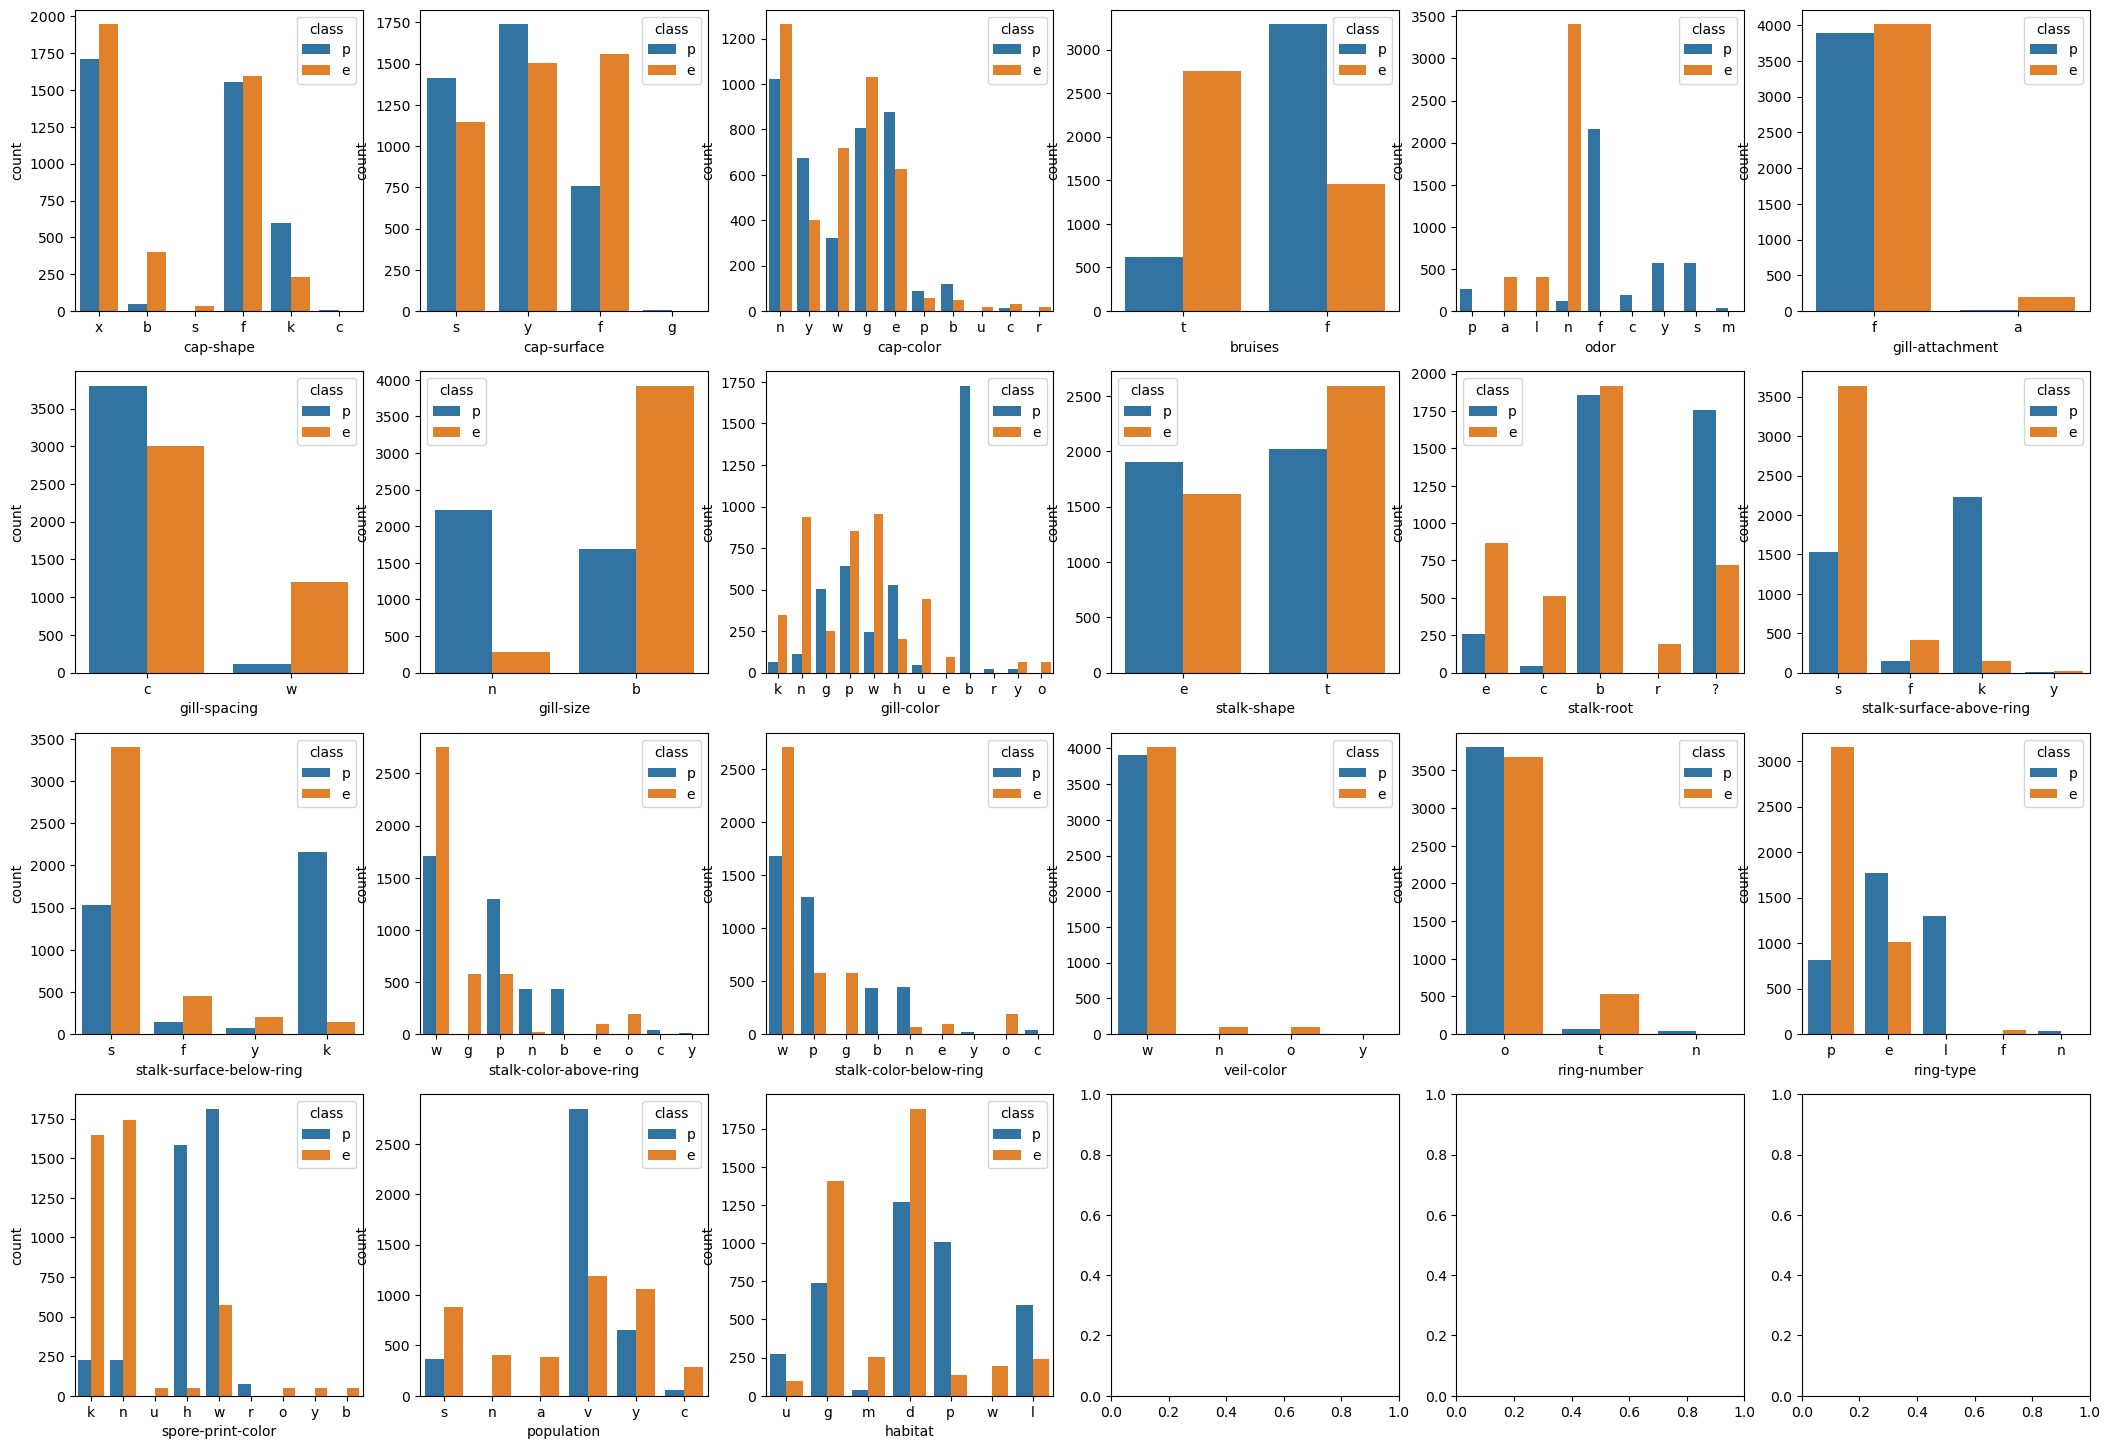

In [7]:
plt.subplots(4,6, figsize = (26,18))

for i in range(len(X_columns)):
    plt.subplot(4,6,i+1)
    sns.countplot(data = df, x = X_columns[i], hue = 'class')
    
plt.show()

## 2. Построить решающую функцию по каждой переменной на основе частот. Вычислить точность каждого решения (на той же обучающей выборке). Найти наиболее информативную переменную (с минимальным числом ошибок).

In [8]:
df = pd.read_csv('mushrooms.csv')
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)
df
#к нам пришёл гриб Антон из таблицы с признаком номер 1, этот признак у него = f, сравниваей с подтаблицей и угадываем, сравнваем ответ ====== счиаем точность на каждом признаке и готово. там где точность выше, тот и самый информативный

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [9]:
acc =[]
feat = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
     'gill-color','stalk-shape', 'stalk-root','stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
     'stalk-color-below-ring','veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
q = df['class']

for i in range(len(feat)):
    prisnak = df2.groupby(i+1)[0].value_counts().unstack().fillna(0)
    p = []    
    for j in range(len(df)):
        prisnak2 = prisnak.transpose()
        prisnak3 = prisnak2[df[feat[i]][j]]
        p.append(prisnak3.idxmax())
    acc.append((feat[i], accuracy_score(q, p)))
    
print(acc)

[('cap-shape', 0.5642540620384048), ('cap-surface', 0.5805022156573116), ('cap-color', 0.5952732644017725), ('bruises', 0.7439684884293452), ('odor', 0.9852289512555391), ('gill-attachment', 0.517971442639094), ('gill-spacing', 0.6159527326440177), ('gill-size', 0.7562776957163959), ('gill-color', 0.8050221565731167), ('stalk-shape', 0.5529295913343181), ('stalk-root', 0.6459871984244214), ('stalk-surface-above-ring', 0.7744953225012309), ('stalk-surface-below-ring', 0.7661250615460364), ('stalk-color-above-ring', 0.7163958641063516), ('stalk-color-below-ring', 0.7144263909404235), ('veil-type', 0.517971442639094), ('veil-color', 0.5189561792220581), ('ring-number', 0.5381585425898572), ('ring-type', 0.7754800590841949), ('spore-print-color', 0.8680452978828164), ('population', 0.7218119153126539), ('habitat', 0.690300344657804)]


In [10]:
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

acc_tab = pd.DataFrame(dict(acc), index = [0])
acc_tab

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.564254,0.580502,0.595273,0.743968,0.985229,0.517971,0.615953,0.756278,0.805022,0.55293,0.645987,0.774495,0.766125,0.716396,0.714426,0.517971,0.518956,0.538159,0.77548,0.868045,0.721812,0.6903


## 3. Построить «наивный» байесовский классификатор из sklearn. Оценить точность. 

In [11]:
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)   
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [12]:
x = df.drop(['class'] , axis = 1)
y = df['class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [15]:
naive_bayes_pred = naive_bayes_model.predict(X_test)

In [16]:
naive_bayes_report = accuracy_score(y_test, naive_bayes_pred, normalize = True)

In [17]:
print(naive_bayes_report)

0.9212307692307692


## 4. Самостоятельно реализовать метод, не используя готовый. Сравнить полученное решение с библиотечным. Добавить регуляризатор в оценки частот.

In [18]:
df = pd.read_csv('mushrooms.csv')
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

In [19]:
df1=df2.copy()

from sklearn import preprocessing
le =preprocessing.LabelEncoder()
for i in range(23):
    df1[i] = le.fit_transform(df2[i])
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [20]:
toch = []
resh_fun = []
cnt = df2[0].value_counts()
p0 = cnt['p']/cnt.sum() #доля р среди всех
z0 = (np.log(p0) - np.log(1.0 - p0))
y_pred = []

In [21]:
for i in range(1,23):
    f= df1.groupby(i)[0].value_counts().unstack().fillna(0)
    
    f['prob'+str(i)] = (f[1]+1)/(f[1]+f[0]+2) #вероятности + регуляризатор (+1, +2) (из лекции)
    
    df1['prob'+str(i)] = df1[i].map(lambda x: f.at[x,'prob'+str(i)]) #добавляю в таблицу
    
    #resh_fun.append(1.0/(1.0+np.exp(sum( 1.0/(1.0+np.exp(df1['prob'+str(i)])))**(-1)+z0) )) #тоже из лекции
    
    f['pred%i'%i] = f['prob'+str(i)].map(lambda x: '0' if x<0.5 else '1')#предсказываю if prob<0.5 = 0, else 1
    
    df1['pred'+str(i)] = df1[i].map(lambda x: f.at[x,'pred'+str(i)])#добавляю предикты в df1
    
    metric = 0
    deli = 8124
    for j in range(8124):
        if int(df1[0][j])==int(df1['pred'+str(i)][j]):
            metric+=1

    toch.append(metric/deli)
f

,0,1,prob22,pred22
22,,,,
0,1880.0,1268.0,0.402857,0
1,1408.0,740.0,0.344651,0
2,240.0,592.0,0.711031,1
3,256.0,36.0,0.125850,0
4,136.0,1008.0,0.880454,1
5,96.0,272.0,0.737838,1
6,192.0,0.0,0.005155,0


In [22]:
(f[1]+1)/(f[1]+f[0]+2)

22
0    0.402857
1    0.344651
2    0.711031
3    0.125850
4    0.880454
5    0.737838
6    0.005155
dtype: float64

In [23]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,prob1,pred1,prob2,pred2,prob3,pred3,prob4,pred4,prob5,pred5,prob6,pred6,prob7,pred7,prob8,pred8,prob9,pred9,prob10,pred10,prob11,pred11,prob12,pred12,prob13,pred13,prob14,pred14,prob15,pred15,prob16,pred16,prob17,pred17,prob18,pred18,prob19,pred19,prob20,pred20,prob21,pred21,prob22,pred22
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5,0.467195,0,0.552385,1,0.446632,0,0.185021,0,0.996124,1,0.492547,0,0.558409,1,0.885044,1,0.158537,0,0.540364,1,0.229055,0,0.296833,0,0.311260,0,0.383565,0,0.383265,0,0.482033,0,0.493187,0,0.508545,1,0.205793,0,0.120064,0,0.295200,0,0.737838,1
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1,0.467195,0,0.552385,1,0.626629,1,0.185021,0,0.002488,0,0.492547,0,0.558409,1,0.301568,0,0.158537,0,0.540364,1,0.080645,0,0.296833,0,0.311260,0,0.383565,0,0.383265,0,0.482033,0,0.493187,0,0.508545,1,0.205793,0,0.114213,0,0.002488,0,0.344651,0
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3,0.107930,0,0.552385,1,0.308061,0,0.185021,0,0.002488,0,0.492547,0,0.558409,1,0.301568,0,0.107619,0,0.540364,1,0.080645,0,0.296833,0,0.311260,0,0.383565,0,0.383265,0,0.482033,0,0.493187,0,0.508545,1,0.205793,0,0.114213,0,0.002488,0,0.125850,0
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5,0.467195,0,0.536352,1,0.308061,0,0.185021,0,0.996124,1,0.492547,0,0.558409,1,0.885044,1,0.107619,0,0.540364,1,0.229055,0,0.296833,0,0.311260,0,0.383565,0,0.383265,0,0.482033,0,0.493187,0,0.508545,1,0.205793,0,0.120064,0,0.295200,0,0.737838,1
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1,0.467195,0,0.552385,1,0.439197,0,0.693263,1,0.034278,0,0.492547,0,0.085997,0,0.301568,0,0.158537,0,0.437527,0,0.229055,0,0.296833,0,0.311260,0,0.383565,0,0.383265,0,0.482033,0,0.493187,0,0.508545,1,0.636789,1,0.114213,0,0.002591,0,0.344651,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2,0.724096,1,0.552385,1,0.446632,0,0.693263,1,0.034278,0,0.089623,0,0.558409,1,0.301568,0,0.261364,0,0.540364,1,0.709508,1,0.296833,0,0.311260,0,0.005155,0,0.005155,0,0.482033,0,0.010204,0,0.508545,1,0.205793,0,0.020000,0,0.154971,0,0.711031,1
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2,0.467195,0,0.552385,1,0.446632,0,0.693263,1,0.034278,0,0.089623,0,0.558409,1,0.301568,0,0.261364,0,0.540364,1,0.709508,1,0.296833,0,0.311260,0,0.005155,0,0.005155,0,0.482033,0,0.010204,0,0.508545,1,0.205793,0,0.020000,0,0.704849,1,0.711031,1
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2,0.493659,0,0.552385,1,0.446632,0,0.693263,1,0.034278,0,0.089623,0,0.558409,1,0.301568,0,0.107619,0,0.540364,1,0.709508,1,0.296833,0,0.311260,0,0.005155,0,0.005155,0,0.482033,0,0.010204,0,0.508545,1,0.205793,0,0.020000,0,0.154971,0,0.711031,1
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2,0.724096,1,0.536352,1,0.446632,0,0.693263,1,0.998270,1,0.492547,0,0.558409,1,0.885044,1,0.999422,1,0.437527,0,0.709508,1,0.296833,0,0.937121,1,0.383565,0,0.383265,0,0.482033,0,0.493187,0,0.508545,1,0.636789,1,0.758577,1,0.704849,1,0.711031,1


In [24]:
df_b = df1.iloc[::1,23::2]
y = df1[0]
X = df_b
X

,prob1,prob2,prob3,prob4,prob5,prob6,prob7,prob8,prob9,prob10,prob11,prob12,prob13,prob14,prob15,prob16,prob17,prob18,prob19,prob20,prob21,prob22
0,0.467195,0.552385,0.446632,0.185021,0.996124,0.492547,0.558409,0.885044,0.158537,0.540364,0.229055,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.120064,0.295200,0.737838
1,0.467195,0.552385,0.626629,0.185021,0.002488,0.492547,0.558409,0.301568,0.158537,0.540364,0.080645,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.114213,0.002488,0.344651
2,0.107930,0.552385,0.308061,0.185021,0.002488,0.492547,0.558409,0.301568,0.107619,0.540364,0.080645,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.114213,0.002488,0.125850
3,0.467195,0.536352,0.308061,0.185021,0.996124,0.492547,0.558409,0.885044,0.107619,0.540364,0.229055,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.120064,0.295200,0.737838
4,0.467195,0.552385,0.439197,0.693263,0.034278,0.492547,0.085997,0.301568,0.158537,0.437527,0.229055,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.636789,0.114213,0.002591,0.344651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.724096,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.261364,0.540364,0.709508,0.296833,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.154971,0.711031
8120,0.467195,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.261364,0.540364,0.709508,0.296833,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.704849,0.711031
8121,0.493659,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.107619,0.540364,0.709508,0.296833,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.154971,0.711031
8122,0.724096,0.536352,0.446632,0.693263,0.998270,0.492547,0.558409,0.885044,0.999422,0.437527,0.709508,0.296833,0.937121,0.383565,0.383265,0.482033,0.493187,0.508545,0.636789,0.758577,0.704849,0.711031


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [26]:
means = X_train.groupby(y_train).apply(np.mean)#среднее значение
stds = X_train.groupby(y_train).apply(np.std)#стандартное отклонение

D:\conda\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
D:\conda\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [27]:
# вычисляем вероятность класса
class_prob = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]
print(class_prob)

0
0    0.516494
1    0.483506
dtype: float64


In [28]:
for elem in range(X_test.shape[0]):# каждый элемент 
    p = {}
    for cl in np.unique(y_train): # для каждого класса
        p[cl] = class_prob[cl]
        for index, param in enumerate(X_test.iloc[elem]):# для каждого столбца
            
           # умножаем вероятность того, что данное значение столбца
           # будет принадлежать распределению для выбранного класса
            p[cl] *= norm.pdf(param, means.iloc[cl, index], stds.iloc[cl, index])
    y_pred.append(pd.Series(p).values.argmax())

In [29]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9884293451501723

## 5. Применить метод логистической регрессии, использовав в качестве переменных оценки вероятностей, подвергнутые обратному логистическому преобразованию.

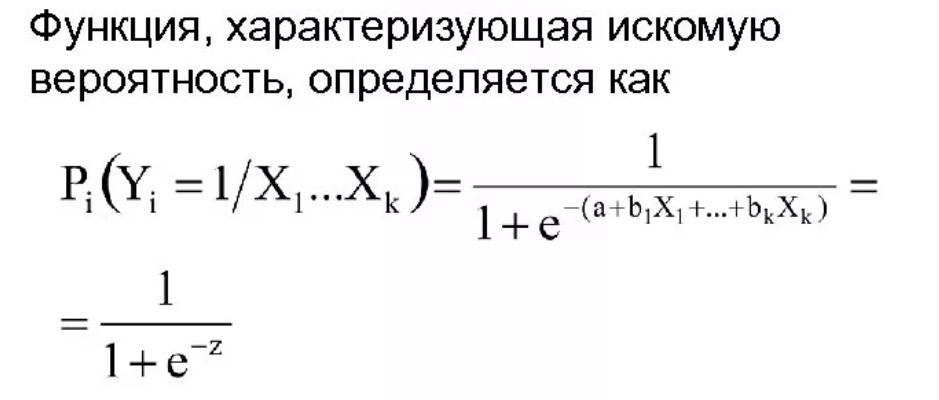

In [141]:
for i in range(1,23):
    X['sig'+str(i)] =1.0/(1.0+np.exp(-np.log((X['prob'+str(i)]/(1 - X['prob'+str(i)]))))) #пропускаем через сигмоиду
    
tr= X.iloc[::1,22::]
tr

,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,sig9,sig10,sig11,sig12,sig13,sig14,sig15,sig16,sig17,sig18,sig19,sig20,sig21,sig22
0,0.467195,0.552385,0.446632,0.185021,0.996124,0.492547,0.558409,0.885044,0.158537,0.540364,0.229055,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.120064,0.295200,0.737838
1,0.467195,0.552385,0.626629,0.185021,0.002488,0.492547,0.558409,0.301568,0.158537,0.540364,0.080645,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.114213,0.002488,0.344651
2,0.107930,0.552385,0.308061,0.185021,0.002488,0.492547,0.558409,0.301568,0.107619,0.540364,0.080645,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.114213,0.002488,0.125850
3,0.467195,0.536352,0.308061,0.185021,0.996124,0.492547,0.558409,0.885044,0.107619,0.540364,0.229055,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.120064,0.295200,0.737838
4,0.467195,0.552385,0.439197,0.693263,0.034278,0.492547,0.085997,0.301568,0.158537,0.437527,0.229055,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.636789,0.114213,0.002591,0.344651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.724096,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.261364,0.540364,0.709508,0.296833,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.154971,0.711031
8120,0.467195,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.261364,0.540364,0.709508,0.296833,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.704849,0.711031
8121,0.493659,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.107619,0.540364,0.709508,0.296833,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.154971,0.711031
8122,0.724096,0.536352,0.446632,0.693263,0.998270,0.492547,0.558409,0.885044,0.999422,0.437527,0.709508,0.296833,0.937121,0.383565,0.383265,0.482033,0.493187,0.508545,0.636789,0.758577,0.704849,0.711031


In [142]:
for i in range(1,23):
    tr['pred%i'%i] = tr['sig'+str(i)].map(lambda x: '0' if x<0.5 else '1')
tr

,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,sig9,sig10,sig11,sig12,sig13,sig14,sig15,sig16,sig17,sig18,sig19,sig20,sig21,sig22,pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10,pred11,pred12,pred13,pred14,pred15,pred16,pred17,pred18,pred19,pred20,pred21,pred22
0,0.467195,0.552385,0.446632,0.185021,0.996124,0.492547,0.558409,0.885044,0.158537,0.540364,0.229055,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.120064,0.295200,0.737838,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0.467195,0.552385,0.626629,0.185021,0.002488,0.492547,0.558409,0.301568,0.158537,0.540364,0.080645,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.114213,0.002488,0.344651,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.107930,0.552385,0.308061,0.185021,0.002488,0.492547,0.558409,0.301568,0.107619,0.540364,0.080645,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.114213,0.002488,0.125850,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0.467195,0.536352,0.308061,0.185021,0.996124,0.492547,0.558409,0.885044,0.107619,0.540364,0.229055,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.120064,0.295200,0.737838,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,0.467195,0.552385,0.439197,0.693263,0.034278,0.492547,0.085997,0.301568,0.158537,0.437527,0.229055,0.296833,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.636789,0.114213,0.002591,0.344651,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.724096,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.261364,0.540364,0.709508,0.296833,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.154971,0.711031,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
8120,0.467195,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.261364,0.540364,0.709508,0.296833,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.704849,0.711031,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
8121,0.493659,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.107619,0.540364,0.709508,0.296833,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.154971,0.711031,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
8122,0.724096,0.536352,0.446632,0.693263,0.998270,0.492547,0.558409,0.885044,0.999422,0.437527,0.709508,0.296833,0.937121,0.383565,0.383265,0.482033,0.493187,0.508545,0.636789,0.758577,0.704849,0.711031,1,1,0,1,1,0,1,1,1,0,1,0,1,0,0,0,0,1,1,1,1,1


In [143]:
acc=[]
for i in range(1,23):
    metric = 0
    for j in range(1,8124):
        if int(df1[0][j])==int(tr['pred'+str(i)][j]):
            metric+=1
    acc.append(metric/8124)  

In [144]:
acc

[0.5642540620384048,
 0.5803791235844412,
 0.5952732644017725,
 0.7439684884293452,
 0.9851058591826687,
 0.517971442639094,
 0.6158296405711472,
 0.7561546036435254,
 0.8050221565731167,
 0.5528064992614475,
 0.6459871984244214,
 0.7744953225012309,
 0.7661250615460364,
 0.7163958641063516,
 0.7144263909404235,
 0.517971442639094,
 0.5189561792220581,
 0.5380354505169868,
 0.7754800590841949,
 0.8680452978828164,
 0.7218119153126539,
 0.6901772525849336]